
---

<div style="text-align: center;">
  <h1>Cybersecurity Data Analysis</h1>
</div>

## Context
Cybersecurity has become a major issue in an increasingly connected world.<br> 
Cybersecurity incidents can have severe impacts on businesses, ranging from data loss to massive privacy breaches.

## Data Source
This dataset is available on the GitHub repository: https://github.com/incribo-inc/cybersecurity_attacks.<br>  
It records various cybersecurity incidents by providing detailed information on network traffic, actions taken, and associated context.<br> 
The data primarily concerns incidents observed in India, offering insights into region-specific vulnerabilities.

## Data Description
The file contains 25 columns and a total of 40,000 rows. This data allows for a better understanding of attack patterns, vulnerable segments, and associated responses.

### Key Variables and Their Meaning
- **Timestamp**: Timestamp of the event, indicating when the incident occurred.
- **Source IP Address** and **Destination IP Address**: IP addresses of the source and destination involved in the traffic.
- **Source Port** and **Destination Port**: Network ports used by the source and destination.
- **Protocol**: Communication protocol (e.g., ICMP, UDP, TCP).
- **Packet Length**: Size of the transmitted packets, measured in bytes.
- **Packet Type**: Type of packet (data or control).
- **Traffic Type**: Type of traffic (HTTP, DNS, etc.).
- **Severity Level**: Severity level of the incident (Low, Medium, High, etc.).
- **Geo-location Data**: Geographical location associated with the incident.
- **Action Taken**: Action taken in response to the incident (e.g., Blocked, Ignored, etc.).
- **User Information** and **Device Information**: Information about the user and the device involved.
- **Network Segment**: Network segment where the incident was recorded.
- **IDS/IPS Alerts**: Alerts from intrusion detection and prevention systems.

Details of questions and analysis directions:

- What are the technical and geographical characteristics of the attacks (traffic types, protocols, vulnerable network segments) and how do they correlate with severity?
- What behaviors and temporal trends do these attacks reveal (privilege exploitation, network requests, periodicity), and how do they influence their success or severity?
- What security measures have been implemented, and how effective are they against the identified attacks?

<b>By synthesizing this information, the analysis aims to identify recurring patterns, explore statistical distributions, and provide insights to improve detection and response strategies.<br> 
This exploration will also help highlight the most vulnerable segments and provide specific recommendations to enhance overall cybersecurity.</b>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Data Loading

In [3]:
path="../data/raw/cybersecurity_attacks.csv"
data= pd.read_csv(path)
data.head

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

## Data Exploration

----------------------

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null


---

### Dataset Description

This dataset contains **25 variables** divided into:

#### Categorical Variables (17):
- `Timestamp` (object format)
- `Source IP Address`
- `Destination IP Address`
- `Protocol`
- `Packet Type`
- `Traffic Type`
- `Payload Data`
- `Malware Indicators` (50% missing values)
- `Alerts/Warnings` (~50% missing)
- `Attack Type`
- `Attack Signature`
- `Action Taken`
- `Severity Level`
- `User Information`
- `Device Information`
- `Network Segment`
- `Geo-location Data`
- `Proxy Information` (~50% missing)
- `Firewall Logs` (~50% missing)
- `IDS/IPS Alerts` (~50% missing)
- `Log Source`

#### Numerical Variables (4):
- `Source Port` (int64)
- `Destination Port` (int64)
- `Packet Length` (int64)
- `Anomaly Scores` (float64)

In [5]:
print("Missing data :")
data.isnull().sum().sort_values(ascending=False)

Missing data :


Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

## Data Preparation



+ **Removal of the "Payload Data" column**:  
This field did not seem necessary for the analysis, so it was removed to lighten the dataset and avoid confusion.

+ **Replacement of missing values**:  
  - "Alerts/Warnings" → "Alert Not Triggered" (indicates that no alert was triggered).  
  - "Firewall Logs" → "No Data" (indicates the absence of records).  
  - "Proxy Information" → "No Data" (standardizes missing data).  
  - "IDS/IPS Alerts" → "No Data" (avoids empty values).  
  - "Malware Indicators" → "Unknown" (indicates an absence or uncertainty regarding malware indicators).

In [6]:
cleaned_data=data.drop("Payload Data",axis=1)
cleaned_data["Alerts/Warnings"] = cleaned_data["Alerts/Warnings"].fillna("Alert Not Triggered")
cleaned_data["Firewall Logs"] = cleaned_data["Firewall Logs"].fillna("No Data")
cleaned_data["Proxy Information"] = cleaned_data["Proxy Information"].fillna("No Data")
cleaned_data["IDS/IPS Alerts"] = cleaned_data["IDS/IPS Alerts"].fillna("No Data")
cleaned_data["Malware Indicators"] = cleaned_data["Malware Indicators"].fillna("Unknown")
cleaned_data.isnull().sum().sort_values(ascending=False)


Timestamp                 0
Source IP Address         0
IDS/IPS Alerts            0
Firewall Logs             0
Proxy Information         0
Geo-location Data         0
Network Segment           0
Device Information        0
User Information          0
Severity Level            0
Action Taken              0
Attack Signature          0
Attack Type               0
Alerts/Warnings           0
Anomaly Scores            0
Malware Indicators        0
Traffic Type              0
Packet Type               0
Packet Length             0
Protocol                  0
Destination Port          0
Source Port               0
Destination IP Address    0
Log Source                0
dtype: int64

In [ ]:
cleaned_data['Browser'] = cleaned_data['Device Information'].str.split('/').str[0]

In [ ]:
platform = r'(Windows|Linux|Android|iPad|iPod|iPhone|Macintosh)'
cleaned_data['Platform'] = cleaned_data['Device Information'].str.extract(platform, flags=re.I).fillna('Unknown')
cleaned_data = cleaned_data.drop('Device Information', axis = 1)

In [9]:
# Extract time features
cleaned_data["Timestamp"] = pd.to_datetime(cleaned_data["Timestamp"], errors='coerce')
cleaned_data['Year'] = cleaned_data["Timestamp"].dt.year
cleaned_data['Month'] = cleaned_data["Timestamp"].dt.month
cleaned_data['Day'] = cleaned_data["Timestamp"].dt.day
cleaned_data['Hour'] = cleaned_data["Timestamp"].dt.hour
cleaned_data['Minute'] = cleaned_data["Timestamp"].dt.minute
cleaned_data['Second'] = cleaned_data["Timestamp"].dt.second
cleaned_data['DayOfWeek'] = cleaned_data["Timestamp"].dt.dayofweek

In [10]:
new_path="../data/processed/processed_cybersecurity_attacks.csv"
cleaned_data.to_csv(new_path)

---

## Univariate Descriptive Analysis


--------------------------------------------------
Variable : Protocol
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


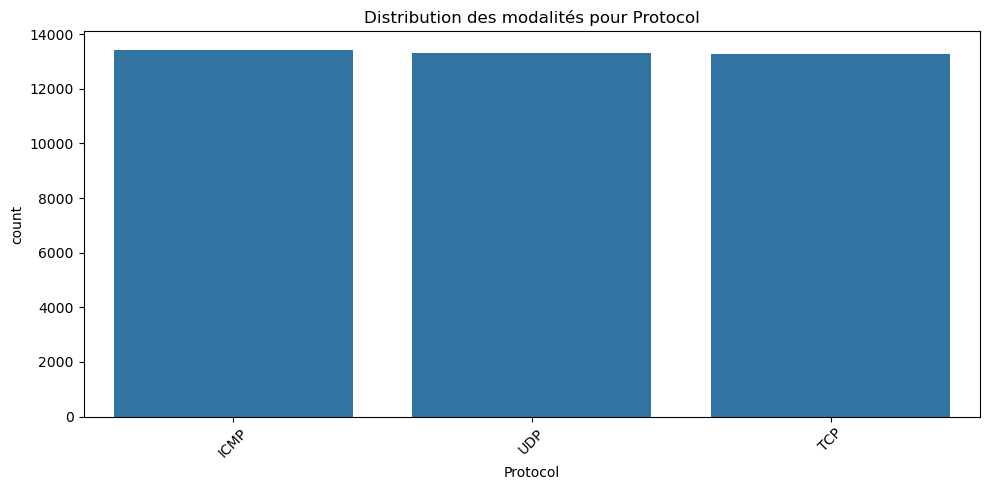


--------------------------------------------------
Variable : Packet Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64


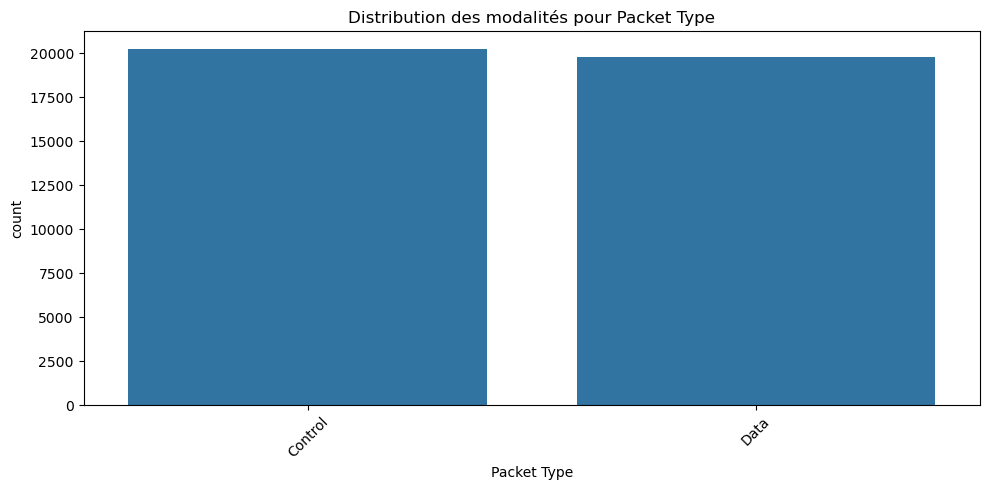


--------------------------------------------------
Variable : Traffic Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64


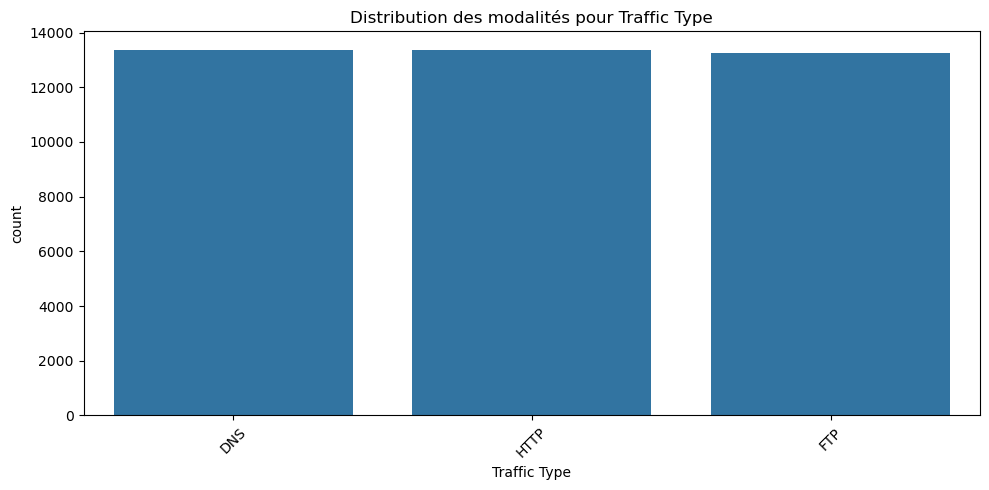


--------------------------------------------------
Variable : Malware Indicators
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Malware Indicators
IoC Detected    20000
Unknown         20000
Name: count, dtype: int64


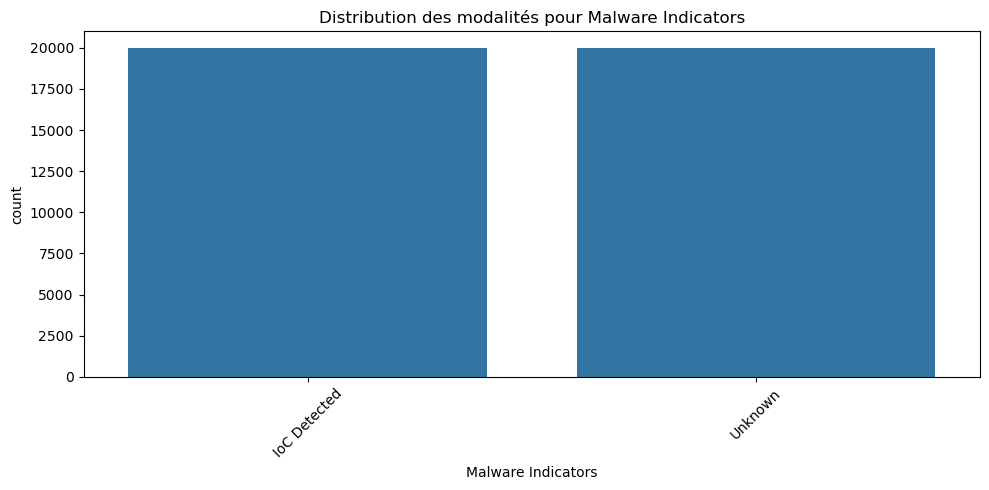


--------------------------------------------------
Variable : Platform
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 7
Top 10 des modalités les plus fréquentes :
Platform
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64


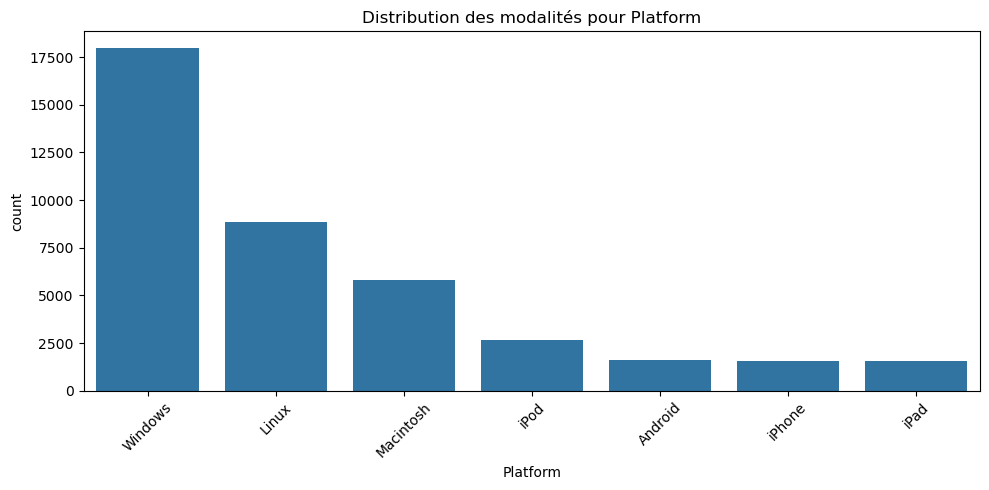


--------------------------------------------------
Variable : Browser
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64


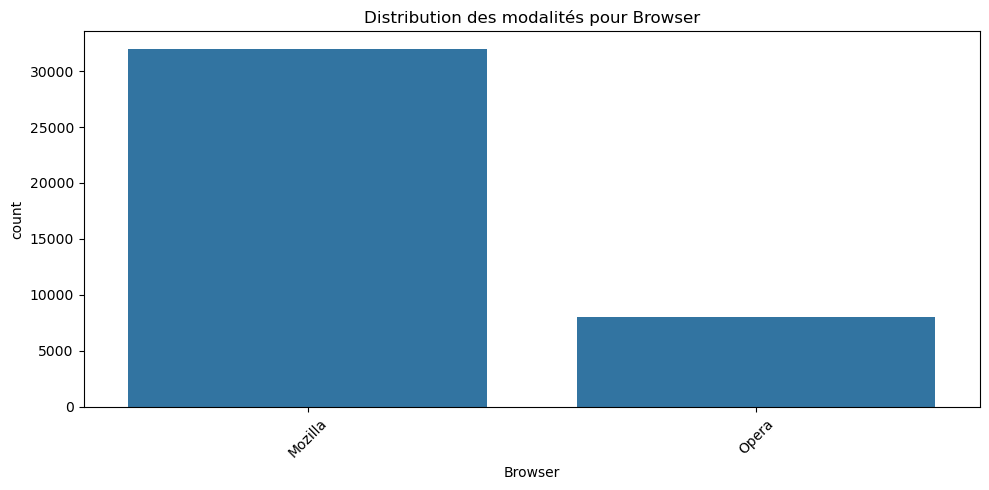


--------------------------------------------------
Variable : Alerts/Warnings
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Alerts/Warnings
Alert Not Triggered    20067
Alert Triggered        19933
Name: count, dtype: int64


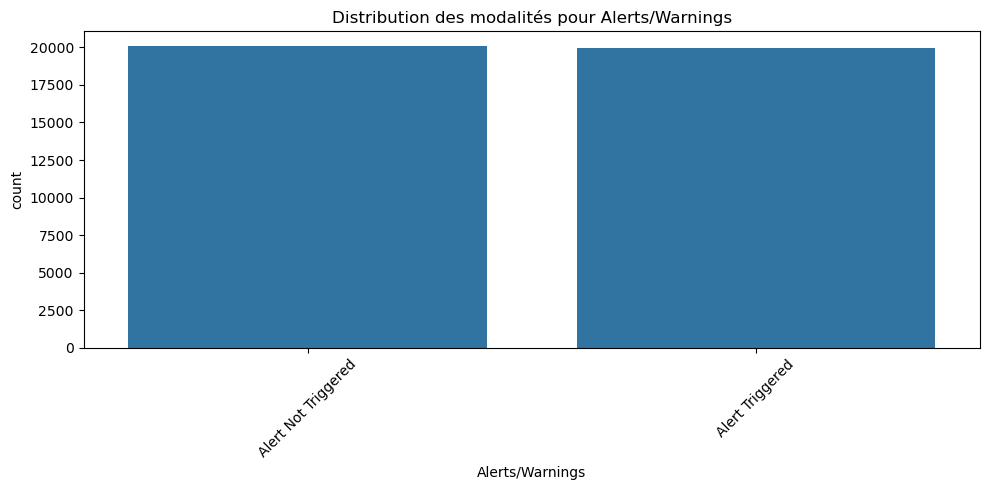


--------------------------------------------------
Variable : Attack Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


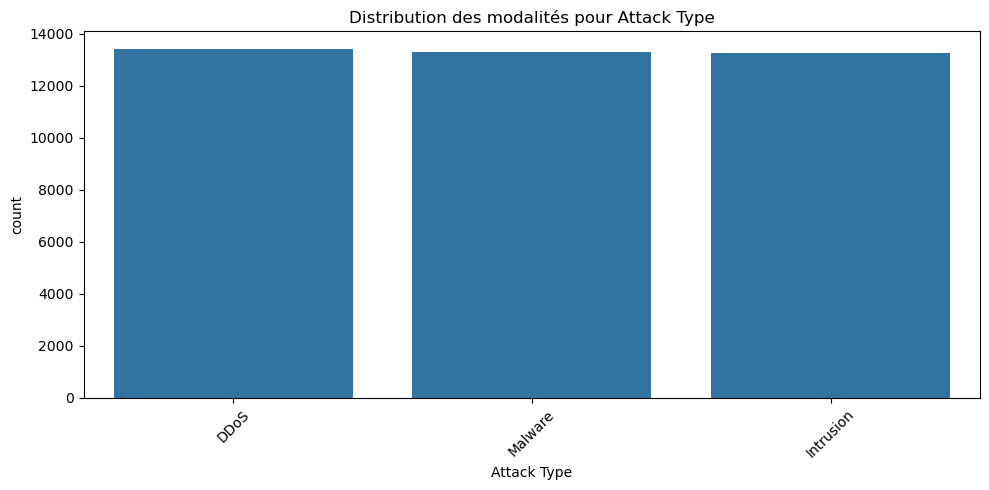


--------------------------------------------------
Variable : Attack Signature
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64


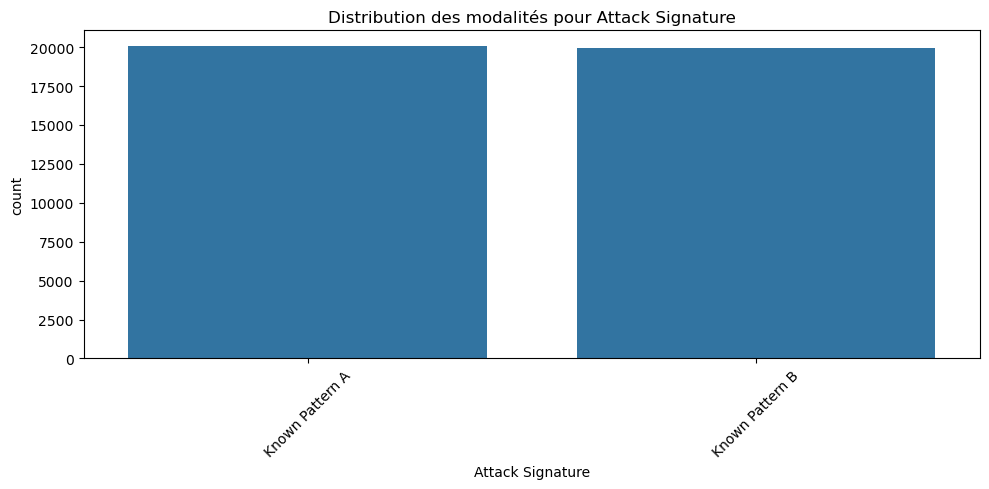


--------------------------------------------------
Variable : Action Taken
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64


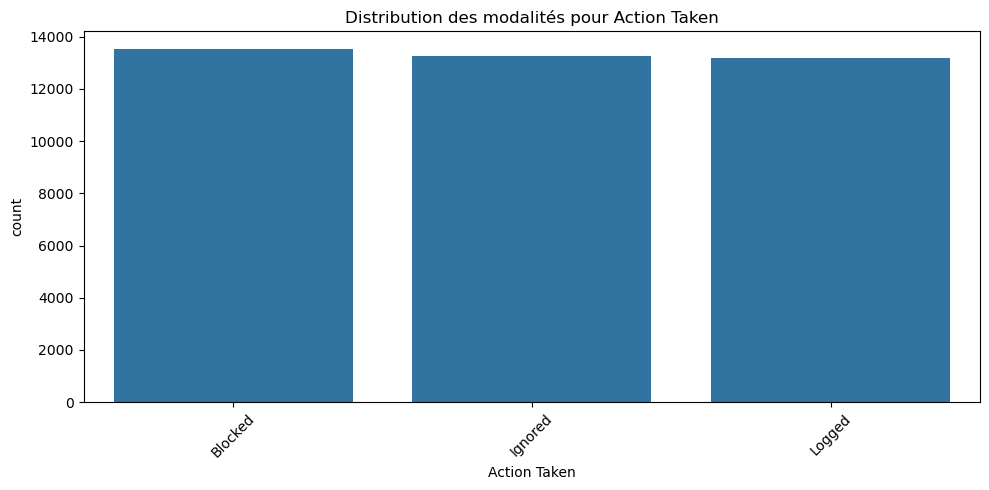


--------------------------------------------------
Variable : Severity Level
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


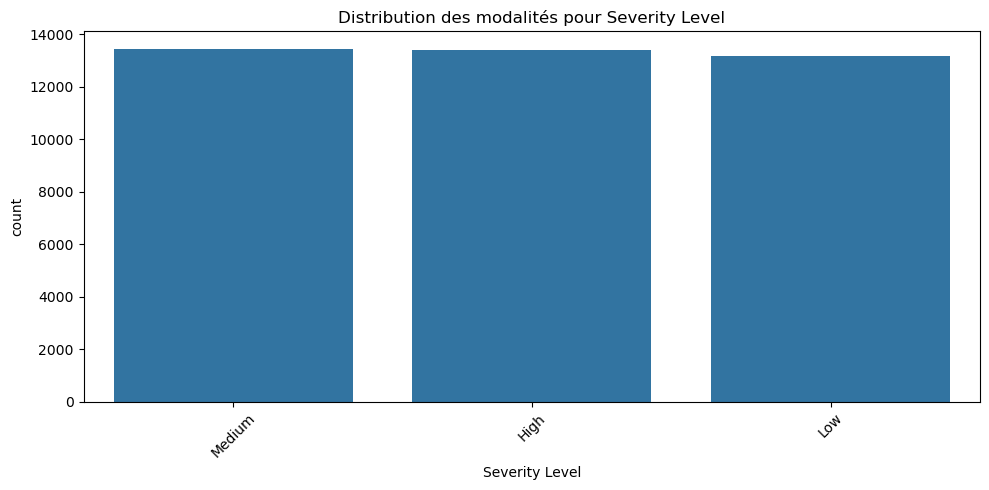


--------------------------------------------------
Variable : Network Segment
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64


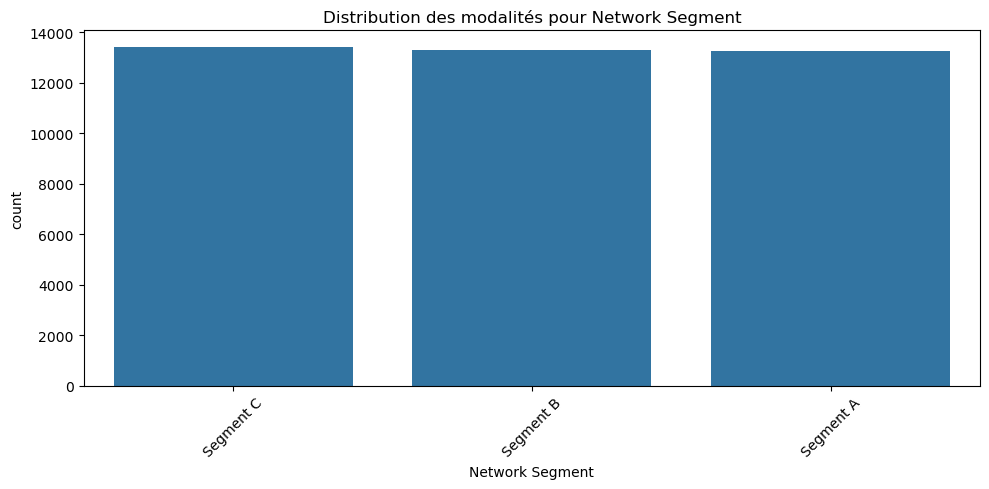


--------------------------------------------------
Variable : Firewall Logs
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Firewall Logs
Log Data    20039
No Data     19961
Name: count, dtype: int64


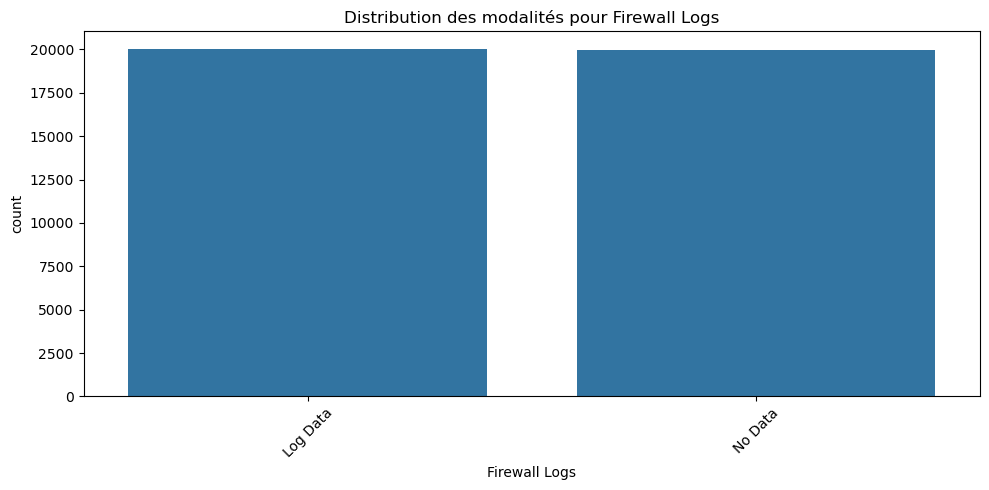


--------------------------------------------------
Variable : IDS/IPS Alerts
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
IDS/IPS Alerts
No Data       20050
Alert Data    19950
Name: count, dtype: int64


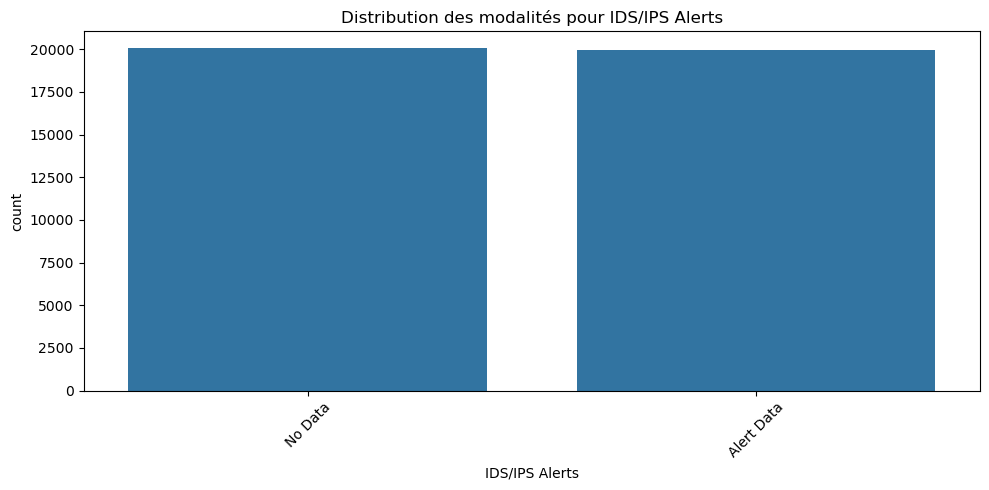


--------------------------------------------------
Variable : Log Source
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64


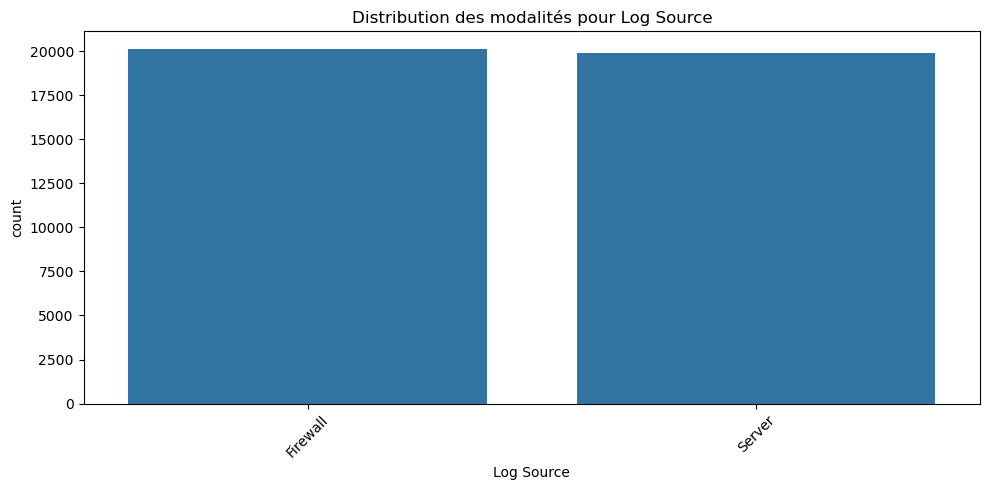

In [ ]:


# Liste des variables catégorielles
variables_categorielles = [
      'Protocol',
    'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators','Platform','Browser',
    'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
    'Severity Level', 'Device Information',
    'Network Segment',  
    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'
]


for var in variables_categorielles:
    if var in cleaned_data.columns:
        print(f"\n{'-'*50}\nVariable : {var}")
        
        
        non_null_count = cleaned_data[var].notnull().sum()
        print(f"Number of non-null values : {non_null_count}")
        
       
        unique_values = cleaned_data[var].nunique(dropna=True)
        print(f"Number of unique modalities : {unique_values}")
        
        
        top_modalities = cleaned_data[var].value_counts(dropna=True).head(10)
        print("Top 10 most frequent modalities :")
        print(top_modalities)
        
        # Visualisation : diagramme en barres des modalités les plus fréquentes
        plt.figure(figsize=(10, 5))
        sns.countplot(data=cleaned_data, x=var, order=top_modalities.index)
        plt.title(f"Distribution of modalities for {var}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


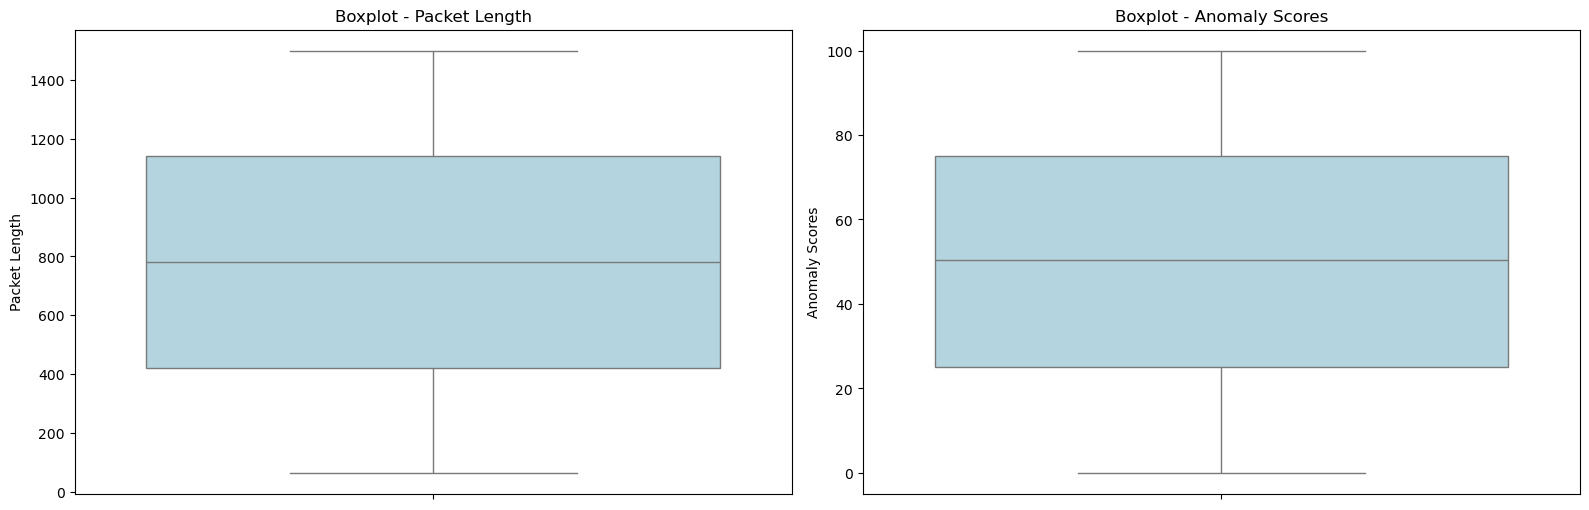

In [12]:


# Liste des variables numériques à visualiser
num_vars = [ 'Packet Length', 'Anomaly Scores']

# Configuration de l'affichage
plt.figure(figsize=(16, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=cleaned_data, y=var, color='lightblue')
    plt.title(f'Boxplot - {var}')
    plt.tight_layout()
plt.show()


### Interpretation of Numerical Variables:

1. **Packet Length:**
   - **Range of values:** Packet length ranges from approximately 0 to 1500 bytes, which is typical for data packets in protocols like TCP, UDP, or ICMP.
   - **Median:** The median around 800 bytes suggests a slightly left-skewed distribution, with a concentration of values around the median but a few smaller values.
   - **Variability:** Significant variability is observed, indicated by a large **IQR** (Interquartile Range), meaning the packet sizes vary considerably from one observation to another.
   - **Outliers:** No outliers are visible based on the statistical definition of outliers (1.5 times the IQR above the 75th percentile or below the 25th percentile).
   
   **Interpretation:**
   - The variability in packet sizes suggests that different types of traffic are involved, such as HTTP, FTP, or even packets related to specific attacks.
   - It would be interesting to cross this variable with **Attack Type** to identify if certain attack types generate larger or smaller packet sizes than usual.

2. **Anomaly Scores:**
   - **Range of scores:** Scores range from 0 to 100, indicating they are normalized or bounded within this range.
   - **Median:** The median around 50 indicates a rather symmetric distribution of scores, suggesting that most events have moderate anomaly scores.
   - **Dispersion:** While the dispersion of scores is significant, no visible outliers are present (according to the IQR).
   
   **Interpretation:**
   - Anomaly scores are uniformly distributed across the range from 0 to 100, meaning incidents are spread across the entire anomaly score spectrum, but no extreme values indicate obvious anomalies.
   - This suggests that incidents in this dataset show a varied range of anomaly levels, but no incident stands out as an extreme or highly deviating anomaly.

### Suggestions:
- **Packet Length vs. Attack Type:** Exploring how packet sizes vary based on attack types could provide valuable insights for early attack detection by analyzing packet patterns.
- **Anomaly Scores:** A deeper analysis of anomaly scores could help understand what variables influence these scores and how they relate to other parameters such as **Severity Level** or **Traffic Type**.


## Multivariate Descriptive Analysis

### Relevance of Principal Component Analysis (PCA)

Before implementing PCA on our dataset, it is important to evaluate the relevance of this method in our specific context:

- **Objective of PCA:** Principal Component Analysis (PCA) is used to reduce the dimensionality of data while preserving as much information as possible. It helps to visualize relationships between numerical variables and detect hidden structures.

- **Limitation of the dataset:** The majority of the variables in our dataset are **categorical or textual** (e.g., `Attack Type`, `Severity Level`, `Protocol`, etc.), which limits the usefulness of a simple PCA.

- **Few numerical variables:** Only a few columns, such as `Packet Length`, `Anomaly Scores`, `Source Port`, and `Destination Port`, are numerical. This significantly restricts PCA’s ability to extract meaningful dimensions.

- **Non-discriminative technical information:** The available numerical variables are primarily technical and do not, on their own, provide a clear view of the nature or severity of attacks.

- **Need for prior encoding:** To include categorical variables in the factor analysis, encoding (e.g., One-Hot Encoding) is necessary. Alternatively, **Multiple Correspondence Analysis (MCA)** would be more suitable for this type of data.

- **Conclusion:** A simple PCA applied only to numerical variables is **not sufficient to extract relevant business insights**. A hybrid or enriched approach is preferred to obtain actionable results in a professional context.

###  AFC


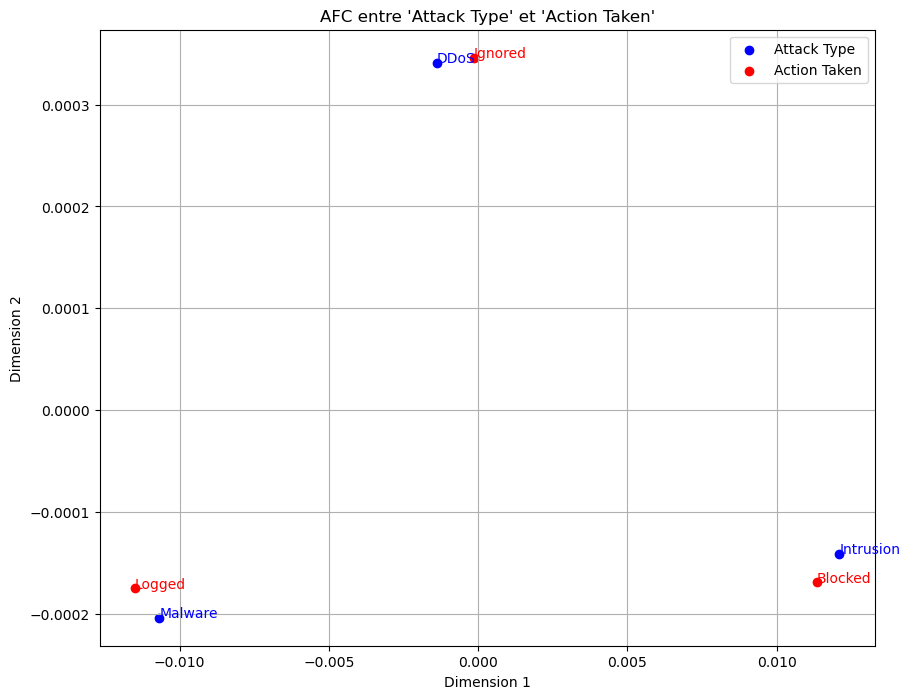

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import prince  # pip install prince

# 1. Sélection des deux variables catégorielles
var1 = 'Attack Type'
var2 = 'Action Taken'

# 2. Création de la table de contingence
contingency_table = cleaned_data[[var1, var2]].dropna()
contingency_table = pd.crosstab(contingency_table[var1], contingency_table[var2])

# 3. Application de l'AFC
ca = prince.CA(n_components=2, engine='sklearn', n_iter=10)
ca = ca.fit(contingency_table)

# 4. Coordonnées des modalités
row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)

# 5. Visualisation du nuage de points
plt.figure(figsize=(10, 8))
plt.title("AFC between '{}' and '{}'".format(var1, var2))

# Points lignes (modalités de var1)
plt.scatter(row_coords[0], row_coords[1], color='blue', label=var1)
for i, txt in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], txt, color='blue')

# Points colonnes (modalités de var2)
plt.scatter(col_coords[0], col_coords[1], color='red', label=var2)
for i, txt in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, color='red')

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


1. **Proximity between categories**:
   - Points close to each other indicate a strong association between the corresponding categories.
   - **"Malware"** and **"Logged"** are very close (both near (-0.010; -0.002)), suggesting that "Malware" attacks are often associated with the action "Logged."
   - **"Intrusion"** and **"Blocked"** are also close (both near (0.010; -0.001)), indicating that "Intrusion" attacks are frequently associated with the action "Blocked."
   - **"DDos"** and **"Ignored"** are close (probably near (0.005; 0.003), like "Dog_Ignored"), which indicates that "DDos" attacks are often associated with the action "Ignored."

2. **Dispersion of points**:
   - The points are mainly spread along Dimension 1 (horizontal axis), indicating that this dimension captures most of the variance in the relationships between "Attack Type" and "Action Taken."
   - Dimension 2 (vertical axis) contributes less to the separation but helps distinguish the "Dog_Ignored", "DDos", and "Ignored" group from the other categories.

### Conclusion
- **Strong associations**:
  - "Malware" attacks are predominantly "Logged."
  - "Intrusion" attacks are predominantly "Blocked."
  - "DDos" attacks are often "Ignored."

- **Usefulness of MCA**: This visual analysis highlights the relationships between attack types and the actions taken, which can be useful for understanding incident response strategies in cybersecurity.

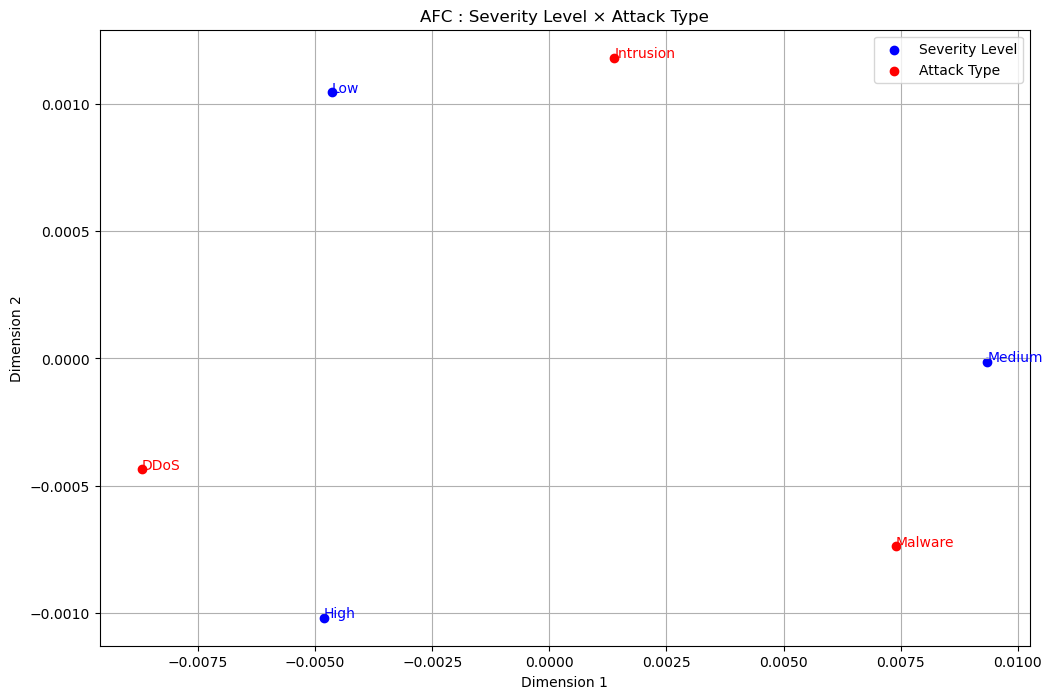

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import prince

# Charger les colonnes nécessaires et supprimer les valeurs manquantes
df_afc = cleaned_data[['Severity Level', 'Attack Type']].dropna()

# Créer la table de contingence
contingency_table = pd.crosstab(df_afc['Severity Level'], df_afc['Attack Type'])

# Appliquer l'AFC avec 2 dimensions
ca = prince.CA(n_components=2, engine='sklearn', n_iter=10)
ca = ca.fit(contingency_table)

# Obtenir les coordonnées des lignes (Severity Level)
row_coords = ca.row_coordinates(contingency_table)

# Obtenir les coordonnées des colonnes (Attack Type)
col_coords = ca.column_coordinates(contingency_table)

# Tracer le nuage des modalités
plt.figure(figsize=(12, 8))
plt.title("AFC : Severity Level × Attack Type")

# Modalités lignes (Severity Level) en bleu
plt.scatter(row_coords[0], row_coords[1], color='blue', label='Severity Level')
for i, label in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, color='blue')

# Modalités colonnes (Attack Type) en rouge
plt.scatter(col_coords[0], col_coords[1], color='red', label='Attack Type')
for i, label in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], label, color='red')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.legend()
plt.show()


**Proximity between categories**:
   - Points close to each other indicate a strong association between the corresponding categories.
   - **"Intrusion"** and **"Low"** are very close (both near (0.050; 0.010)), suggesting that "Intrusion" attacks are often associated with a "Low" severity level.
   - **"Malware"** and **"Medium"** are also close (both near (0.075; 0.000 to -0.005)), indicating that "Malware" attacks are frequently associated with a "Medium" severity level.
   - **"DDoS"** and **"High"** are close (both near (-0.050 to -0.075; -0.005 to -0.010)), which indicates that "DDoS" attacks are often associated with a "High" severity level.

### Conclusion
- **Strong associations**:
  - "Intrusion" attacks are predominantly associated with a "Low" severity level.
  - "Malware" attacks are predominantly associated with a "Medium" severity level.
  - "DDoS" attacks are predominantly associated with a "High" severity level.

- **Usefulness of MCA**: This visual analysis highlights the relationships between attack types and their severity levels, which can be useful for prioritizing incident response actions. For example, since "DDoS" attacks are associated with a "High" severity level, they may require immediate attention and additional resources.

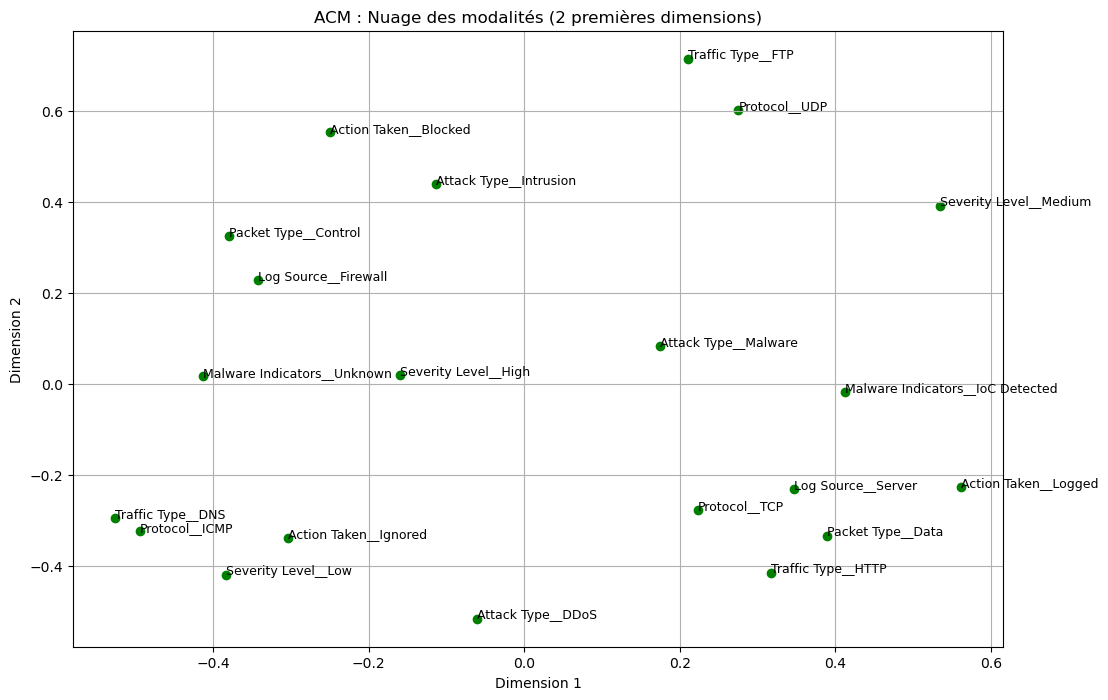

In [15]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Sélectionner les variables catégorielles (modifie selon ton nettoyage)
cat_vars = [
    'Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
    'Attack Type', 'Severity Level', 'Action Taken', 'Log Source'
]

# Supprimer les valeurs manquantes
df_acm = cleaned_data[cat_vars].dropna()

# Appliquer l'ACM (Analyse des Correspondances Multiples)
mca = prince.MCA(
    n_components=2,
    n_iter=10,
    copy=True,
    engine='sklearn',
    random_state=42
)

mca = mca.fit(df_acm)

# Récupérer les coordonnées des modalités
modality_coords = mca.column_coordinates(df_acm)

# Afficher le nuage des modalités
plt.figure(figsize=(12, 8))
plt.title("ACM : Nuage des modalités (2 premières dimensions)")

plt.scatter(modality_coords[0], modality_coords[1], color='green')

for i, label in enumerate(modality_coords.index):
    plt.text(modality_coords.iloc[i, 0], modality_coords.iloc[i, 1], label, fontsize=9, color='black')

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


### Types of Attacks and Severity
- The types of attacks (DDoS, Malware, Intrusion) are well separated according to their severity (`Severity Level`) and their corresponding action (`Action Taken`).
  
### Protocol and Source
- Sources and protocols (TCP, UDP, HTTP) show a clear distinction in the clusters based on their role in the detected threats.

## Conclusion

The Multiple Correspondence Analysis (MCA) reveals important relationships between categorical variables:

1. **Threat Segmentation**: The identified clusters allow for the grouping of network event types (Intrusions, DDoS, Malware) and the evaluation of their respective severity.
   
2. **Prioritization of Actions**: The modalities of actions taken (`Blocked`, `Logged`, `Ignored`) reflect different strategies based on the threat level and traffic type.
   
3. **Strategic Analysis**: The results enable the construction of targeted policies for each cluster. For example:
   - Immediately block critical events (Intrusions, Malware).
   - Monitor or log moderate threats.
   - Ignore less severe events.

## Data Visualization

In [132]:
# Checking the Day Column plotting with plotly
import plotly.express as px
plt = px.histogram(cleaned_data, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')
plt.show()


**Number of Malware Attacks by Day**  
- This stacked area chart tracks malware attacks over 30 days, split into IoC Detected (blue) and Unknown (red).  
- Total attacks peak at ~1300 around day 2 or 3, then gradually decline to below 400 by day 30.  
- IoC Detected attacks dominate, often double the Unknown, starting at 800-900 and falling to 200-300 by the end, showing strong detection of known threats.  
- Unknown attacks persist at 400-600 for most of the period, dropping to ~100 by day 30, revealing gaps in detecting new or evolving malware.  
- The downward trend may indicate improved defenses or reduced attack attempts over time.  
- The consistent presence of Unknown attacks underscores the need for better threat intelligence to address unidentified threats effectively.

In [133]:
# Protocol vs Severity Level - Shows which protocols present the highest security risks
fig = px.histogram(cleaned_data, x='Protocol', color='Severity Level', 
                   title='Distribution of Protocols by Severity Level', barmode='group')
fig.show()

**Distribution of Protocols by Severity Level**  
- The grouped bar chart displays protocols (ICMP, UDP, TCP) across severity levels: Low (blue), Medium (red), and High (green).  
- Each protocol shows a balanced distribution, with attack counts ranging between 4000 and 4500 for all severity levels.  
- ICMP has a slightly higher count of Low severity attacks, indicating a minor tendency toward less severe threats.  
- UDP exhibits more Medium severity attacks, while TCP has a higher count of High severity attacks, suggesting varied risk profiles.  
- The even spread across severities implies no protocol is uniquely vulnerable to a specific threat level, but all face significant risks.  
- This highlights the need for comprehensive, protocol-agnostic security measures to address threats of all severity levels effectively.

In [136]:
# Platform distribution - Shows which platforms are most targeted
# Answers: How are attacks distributed across different platforms?
platform_counts = cleaned_data['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']
fig = px.pie(platform_counts, values='Count', names='Platform', 
             title='Distribution of Attacks by Platform')
fig.show()

**Distribution of Attacks by Platform**  
- The pie chart illustrates attack distribution across platforms: Windows (44.9%), Linux (22.1%), Macintosh (14.5%), iPod (6.64%), Android (4.03%), iPhone (4.03%), and iPad (3.67%).  
- Windows is the most targeted platform, likely due to its dominant market share and legacy vulnerabilities, making it a prime target for attackers.  
- Linux, at 22.1%, ranks second, reflecting its increasing use in servers, which are frequent targets for cyber attacks.  
- Macintosh follows at 14.5%, while mobile platforms (iPod, Android, iPhone, iPad) have smaller shares, suggesting they are lower-priority targets for attackers.  
- The data emphasizes the need for robust defenses on Windows and Linux systems, given their high attack rates.  
- It also suggests monitoring mobile platforms, as their smaller shares may still pose emerging risks.

In [141]:
# Actions taken analysis - Evaluates security response effectiveness
# Answers: What types of security measures were taken and how effective were they?
action_counts = cleaned_data.groupby(['Action Taken', 'Severity Level']).size().reset_index(name='Count')
fig = px.sunburst(action_counts, path=['Action Taken', 'Severity Level'], values='Count',
                 title='Security Actions Taken by Severity Level')
fig.show()

**Security Actions Taken by Severity Level**  
- The nested pie chart shows actions (Blocked, Ignored, Logged) across severity levels: Low (inner), Medium, and High (outer).  
- Blocked-High (outer blue) and Logged-High (outer green) are the largest segments, indicating most severe attacks are either blocked or logged, reflecting robust defensive measures.  
- Ignored-Low (inner red) is a significant portion, suggesting low-severity threats often receive less attention, which could be risky if they escalate.  
- Medium severity attacks are evenly distributed across all actions, indicating a balanced approach to handling moderate threats.  
- The chart highlights effective responses to high-severity attacks but reveals a potential gap in addressing lower-severity threats.  
- This suggests a need to reassess strategies for low-severity threats to prevent escalation.

In [145]:
# Time of day analysis - Identifies peak attack hours
# Answers: When do most attacks occur during the day?
hour_counts = cleaned_data.groupby('Hour').size().reset_index(name='Count')
fig = px.line(hour_counts, x='Hour', y='Count', 
              title='Attack Frequency by Hour of Day', 
              markers=True)
fig.show()

**Attack Frequency by Hour of Day**  
- The line graph tracks attack frequency over a 24-hour period, with counts fluctuating between 1600 and 1740 attacks.  
- Peaks occur around hours 2, 8, and 17, each nearing 1740, suggesting increased activity, possibly due to higher network usage or scheduled attack patterns.  
- A notable drop to around 1600 attacks occurs at hour 13, indicating a lull, which may result from system downtimes or strategic pauses by attackers.  
- Smaller fluctuations are observed throughout the day, reflecting inconsistent attack patterns across different hours.  
- These variations emphasize the need for time-specific monitoring, particularly during peak hours, to strengthen defenses.  
- Focusing security efforts around hours 2, 8, and 17 could help mitigate the most frequent attacks effectively.

In [146]:
# Attack type analysis - Shows distribution of different attack types
# Answers: What types of attacks are most common?
attack_counts = cleaned_data['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']
fig = px.bar(attack_counts.head(10), x='Attack Type', y='Count',
             title='Top 10 Attack Types')
fig.show()



**Attack Success by Action Type**  
- The bar chart compares attack outcomes (Success: True/False) across three response actions: Blocked, Ignored, and Logged.  
- In all categories, **unsuccessful attacks (False, blue)** are significantly higher, ranging between 8000 and 9000, indicating strong defensive outcomes.  
- **Successful attacks (True, red)** are notably fewer, around 4000 to 4500, but still present across all actions.  
- The **Blocked** action has the highest number of unsuccessful attempts, demonstrating its relative effectiveness in mitigating threats.  
- Both **Ignored** and **Logged** actions show similar distributions, with fewer blocked successes, suggesting weaker defensive impact.  
- These results highlight that while blocking is the most effective, it is not infallible.  



In [148]:
# Severity distribution over time - Tracks changes in attack severity over time
# Answers: Is attack severity increasing or decreasing over time?
severity_time = cleaned_data.groupby(['Month', 'Severity Level']).size().reset_index(name='Count')
fig = px.line(severity_time, x='Month', y='Count', color='Severity Level',
             title='Attack Severity Trends by Month',
             markers=True)
fig.show()


**Attack Severity Over Time**  
- The line graph tracks attack severity (Low, Medium, High) over 12 months, with counts ranging from 850 to 1225.  
- All severities peak around month 4 at 1225, indicating a significant rise in attacks early in the year.  
- After the peak, there is a sharp decline, with counts dropping to around 850 by month 12.  
- High severity (blue) consistently has the highest count, showing that more dangerous attacks are prevalent earlier in the year.  
- Medium (green) and Low (red) severities follow similar patterns, though at lower counts.


In [149]:
# Traffic vs Protocol analysis - Shows relationship between traffic types and protocols
# Answers: Which protocols are used for different traffic types?
fig = px.density_heatmap(cleaned_data, x='Protocol', y='Traffic Type',
                        title='Relationship Between Protocols and Traffic Types')
fig.show()


**Relationship between Protocols and Traffic Types**  
- The heatmap illustrates attack counts across various protocols (ICMP, UDP, TCP) and traffic types (HTTP, DNS, FTP).  
- **TCP-HTTP** has the highest attack count (around 4520, yellow), indicating it is a prime target, likely due to the widespread use of HTTP in web services.  
- **ICMP-FTP** has the lowest count (around 4380, dark purple), suggesting that this combination is less targeted, possibly because of the limited use of FTP in comparison to other traffic types.  
- **UDP-DNS** and **TCP-DNS** show higher counts (around 4460), emphasizing the vulnerability of DNS-based traffic to attacks.  
- This distribution highlights that **TCP and DNS traffic**, particularly HTTP and DNS protocols, are key areas where defense efforts should be concentrated.



In [152]:
# Combined severity and traffic type analysis
# Answers: Which traffic types have the most severe security incidents?
severity_traffic = cleaned_data.groupby(['Traffic Type', 'Severity Level']).size().reset_index(name='Count')
fig = px.sunburst(severity_traffic, path=['Traffic Type', 'Severity Level'], values='Count',
                 title='Traffic Types by Severity Level')
fig.show()

**Traffic Types by Severity Level**  
- The nested pie chart shows the distribution of traffic types (HTTP, DNS, FTP) by attack severity (Low, Medium, High).  
- **HTTP-High** (outer blue) and **DNS-High** (outer green) dominate the chart, indicating that these traffic types are most vulnerable to high-severity attacks. This is likely due to their critical roles in network communication.  
- **FTP-Low** (inner green) is the smallest segment, suggesting that FTP faces fewer severe threats.  
- The **Medium severity** category is fairly balanced across all traffic types, reflecting consistent, moderate-level risk across each type.  
- This distribution highlights the need for enhanced security on **HTTP and DNS traffic**, particularly for high-severity threats, while also maintaining vigilance on **FTP** traffic to address potential risks.


In [155]:
# Attack success analysis - Determine which attacks were successful despite actions taken
# First, create a column to classify if attack was successful despite actions
cleaned_data['Attack Success'] = (cleaned_data['Severity Level'] == 'High') | (cleaned_data['Severity Level'] == 'Critical')
success_by_action = cleaned_data.groupby(['Action Taken', 'Attack Success']).size().reset_index(name='Count')
fig = px.bar(success_by_action, x='Action Taken', y='Count', color='Attack Success',
            title='Attack Success by Action Taken',
            barmode='group')
fig.show()



**Attack Success by Action Taken**  
- The bar chart compares attack success (True/False) across three actions: Blocked, Ignored, and Logged.  
- **Unsuccessful attacks (False, blue)** dominate across all actions, with counts ranging from 8000 to 9000, indicating that most attacks do not succeed.  
- **Successful attacks (True, red)** are lower, around 4000 to 4500, showing that while blocked actions are generally effective, some attacks still get through.  
- **Blocking** has the highest number of unsuccessful attacks, suggesting that it is the most effective action in preventing attack success.  
- **Ignoring** and **Logging** show similar patterns, with fewer successful attacks, implying that these actions are less effective at preventing attacks compared to blocking.  
- This pattern emphasizes the need to **prioritize blocking mechanisms** and further investigate why some attacks still succeed.

In [160]:
# 3D Network Attack Analysis Visualization
# Answers: How do attacks vary across time, severity, and network characteristics?
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Create 'DayName' column if it doesn't exist
if 'DayName' not in cleaned_data.columns:
    day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    cleaned_data['DayName'] = cleaned_data['DayOfWeek'].map(day_map)

# Prepare data for 3D visualization
# Sample 5000 points for better performance
if len(cleaned_data) > 5000:
    sample_data = cleaned_data.sample(5000, random_state=42)
else:
    sample_data = cleaned_data

# Encode categorical variables numerically for visualization
protocol_map = {p: i for i, p in enumerate(sample_data['Protocol'].unique())}
severity_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
network_map = {n: i for i, n in enumerate(sample_data['Network Segment'].unique())}

# Create numeric representations
protocol_num = sample_data['Protocol'].map(protocol_map)
severity_num = sample_data['Severity Level'].map(severity_map)
network_num = sample_data['Network Segment'].map(network_map)

# Set up marker sizes based on packet length
marker_size = sample_data['Packet Length'] / sample_data['Packet Length'].max() * 15 + 5

# Create hover text with detailed information
hover_text = []
for idx, row in sample_data.iterrows():
    hover_text.append(
        f"Attack Type: {row['Attack Type']}<br>" +
        f"Protocol: {row['Protocol']}<br>" +
        f"Severity: {row['Severity Level']}<br>" +
        f"Network: {row['Network Segment']}<br>" +
        f"Hour: {row['Hour']}<br>" +
        f"Day: {row['DayName']}<br>" +
        f"Packet Length: {row['Packet Length']}<br>" +
        f"Action: {row['Action Taken']}"
    )

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=protocol_num,
    y=severity_num,
    z=sample_data['Hour'],
    text=hover_text,
    hoverinfo='text',
    mode='markers',
    marker=dict(
        size=marker_size,
        color=network_num,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title="Network Segment",
            tickvals=list(network_map.values()),
            ticktext=list(network_map.keys())
        )
    )
)])

# Update layout with comprehensive labels
fig.update_layout(
    title='3D Cybersecurity Attack Analysis',
    scene=dict(
        xaxis=dict(
            title='Protocol Type',
            tickvals=list(protocol_map.values()),
            ticktext=list(protocol_map.keys()),
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
        yaxis=dict(
            title='Severity Level',
            tickvals=[0, 1, 2, 3],
            ticktext=['Low', 'Medium', 'High', 'Critical'],
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
        zaxis=dict(
            title='Hour of Day',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 250)'
        ),
    ),
    height=800,
    width=1000
)

fig.show()

# Add explanatory text
print("3D Attack Pattern Analysis:")
print("----------------------------")
print("This visualization reveals multi-dimensional relationships between:")
print("- Protocol types (x-axis)")
print("- Attack severity (y-axis)")
print("- Time of day (z-axis)")
print("- Network segment (color)")
print("- Packet size (marker size)")
print("\nKey insights to look for:")
print("1. Clusters indicate common attack patterns")
print("2. Outliers may represent unusual or targeted attacks")
print("3. Color patterns show which network segments are vulnerable at specific times")
print("4. Large markers highlight attacks with significant data transfer")

3D Attack Pattern Analysis:
----------------------------
This visualization reveals multi-dimensional relationships between:
- Protocol types (x-axis)
- Attack severity (y-axis)
- Time of day (z-axis)
- Network segment (color)
- Packet size (marker size)

Key insights to look for:
1. Clusters indicate common attack patterns
2. Outliers may represent unusual or targeted attacks
3. Color patterns show which network segments are vulnerable at specific times
4. Large markers highlight attacks with significant data transfer
